In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [3]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML, display
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler)
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import random
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from lightgbm.sklearn import LGBMClassifier


<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

In [4]:
df = pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [5]:
train_df, test_df = train_test_split(df, test_size=0.30, random_state=123)
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

Part 1

train_df.describe() gives us a summary of all columns in the train dataframe while train_df.info() provides insights to the characteristics of the dataframe. For example through train_df.info() we can see that there's no missing value in the dataframe, and we know the data size and the data types of all columns.

In [6]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   2100

Part 2

1. We can know the average credit limit within the dataset by filtering the the credit limit and finding the median. For this dataset the median credit limits of credit card clients is $140,000.

2. We can know the average age of credit card clients by filtering out the age and finding the mean. In this dataset, the mean age of clients is ~35.5

3. The histogram displays the distribution of credit limits across the dataset. The LIMIT_BAL distribution shows where most clients fall within a certain credit range, giving an idea of how credit is typically allocated. As this is skewed towards the right it demonstrates that there are generally more individuals with a lower credit limit

4. The boxplot should helps visualize trends like whether younger singles tend to have lower credit limits, or if older married individuals have higher limits, providing better insight into how age and marital status correlate with credit limits.



In [8]:
median_limit_bal = train_df['LIMIT_BAL'].median()
print("Median Credit Limit of Credit Card Clients:\n", median_limit_bal)

Median Credit Limit of Credit Card Clients:
 140000.0


In [9]:
mean_age = train_df['AGE'].mean()
print("Mean Age of Credit Card Clients:\n", mean_age)

Mean Age of Credit Card Clients:
 35.50080952380952


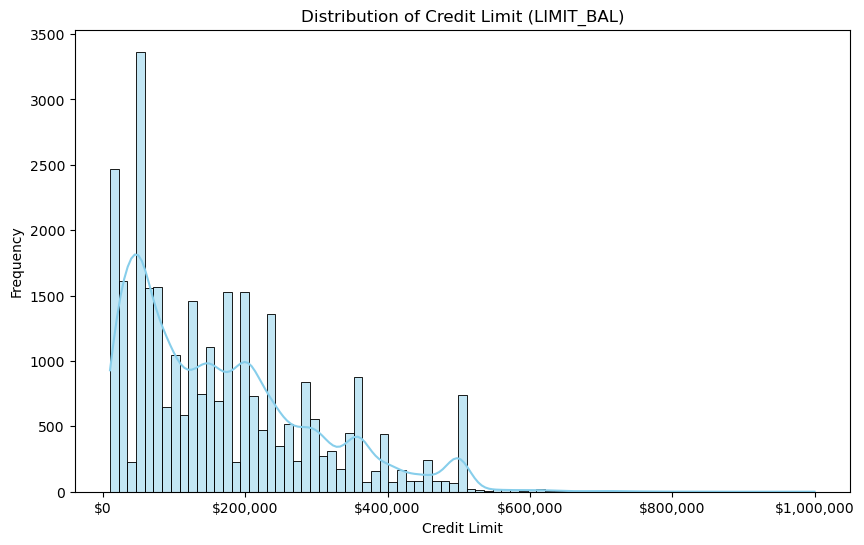

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['LIMIT_BAL'], kde=True, color='skyblue')
plt.title('Distribution of Credit Limit (LIMIT_BAL)')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.show()

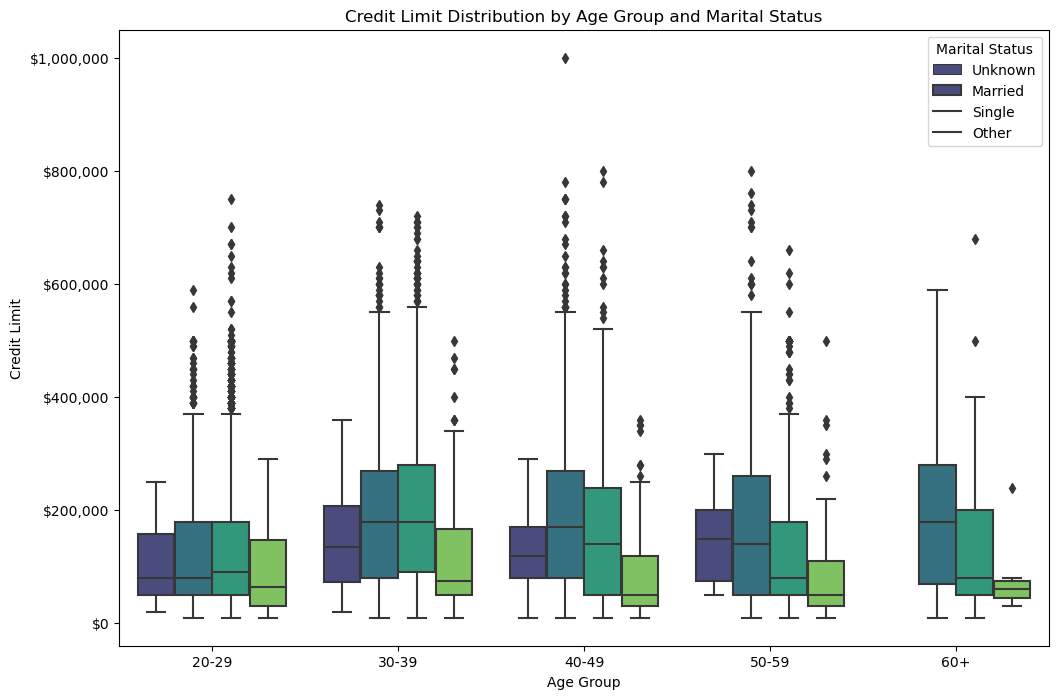

In [11]:

age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60+']
df['age_group'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='age_group', y='LIMIT_BAL', hue='MARRIAGE', palette='viridis')
plt.title('Credit Limit Distribution by Age Group and Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Credit Limit')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.legend(title='Marital Status', labels=['Unknown', 'Married', 'Single', 'Other'])
plt.show()

Part 3

1. The histogram of credit limits shows that most clients have credit limits below 200,000, this skew demonstrates that having a high credit limit is relatively rare. 
2. The average age indicates that credit card clients in this dataset are generally middle-aged with less emphasis on younger or older clientelle
3. There is not a specific correlation to older age with a higher credit limit, seemingly the middle aged clients have the highest credit limit
4. Lack of missing values, makes the data preprocessing an easier process. 

Part 4

For credit default prediction, we’re prioritizing recall as our primary metric because it focuses on minimizing false negatives—cases where actual defaults are missed. In this context, identifying as many true defaults as possible is crucial to mitigate financial risk, even if it means potentially flagging some non-defaulting customers. By maximizing recall, we ensure the model captures the majority of high-risk cases, which aligns with our goal of minimizing credit losses from undetected defaults.


In [12]:
from sklearn.metrics import recall_score, make_scorer
recall_scorer = make_scorer(recall_score, average='binary', zero_division=1)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [13]:
# 1. Creating Worst Payment Delay
payment_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
train_df['worst_payment_delay'] = train_df[payment_cols].max(axis=1)

# 2. Creating Bill Amount Features
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Bill Amount Standard Deviation (to capture variability)
train_df['bill_amt_std'] = train_df[bill_cols].std(axis=1)

# Most recent bill amount (BILL_AMT6)
train_df['last_bill_amt'] = train_df['BILL_AMT6']

# 3. Creating Payment Amount Features
pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Payment Amount Standard Deviation
train_df['pay_amt_std'] = train_df[pay_cols].std(axis=1)


# Calculate payment ratios for each month and drop intermediate columns later
for i in range(1, 7):
    bill_col = f'BILL_AMT{i}'
    pay_col = f'PAY_AMT{i}'
    ratio_col = f'payment_ratio_{i}'
    train_df[ratio_col] = train_df[pay_col] / train_df[bill_col].replace(0, 1)

# Average credit utilization over 6 months
train_df['avg_credit_utilization'] = train_df[bill_cols].mean(axis=1) / train_df['LIMIT_BAL']

# Most recent month’s credit utilization
train_df['last_credit_utilization'] = train_df['BILL_AMT6'] / train_df['LIMIT_BAL']

# Display the final DataFrame with new features
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,last_bill_amt,pay_amt_std,payment_ratio_1,payment_ratio_2,payment_ratio_3,payment_ratio_4,payment_ratio_5,payment_ratio_6,avg_credit_utilization,last_credit_utilization
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,3788.0,2670.031192,0.172259,0.178076,0.034849,0.154879,0.000000,1.851373,0.062090,0.011838
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,117870.0,52251.249649,0.787645,142.852941,1.487052,0.017624,0.099406,0.438305,0.200313,0.267886
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000112,-0.000112
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,47379.0,1422.867387,0.036478,0.053490,0.040155,0.029275,0.028202,0.035923,0.737058,0.394825
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27380.0,572.712843,0.000000,0.029860,0.044170,0.054377,0.035829,0.054785,0.683603,0.547600


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [14]:
numeric_features = [
    'LIMIT_BAL', 'AGE', 
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    'worst_payment_delay',                  
    'avg_credit_utilization' 
]


categorical_features = ['EDUCATION', 'MARRIAGE'] 


binary_features = ['SEX'] 


drop_features = ['ID']


target = "default.payment.next.month" 

In [15]:
numeric_transformer = StandardScaler()
binary_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='if_binary',dtype = int)
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='if_binary',dtype = int)
)

In [16]:
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    ('drop', drop_features),
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_0', 'PAY_2', 'PAY_3',
                                  'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1',
                                  'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                                  'PAY_AMT5', 'PAY_AMT6', 'worst_payment_delay',
                                  'avg_credit_utilization']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>,
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['SEX']),
                                ('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['EDUCATION', 'MARRIAGE']),
                                ('drop', 'drop', ['ID'])])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [17]:
X_train = train_df.drop(["default.payment.next.month"], axis=1)
y_train = train_df["default.payment.next.month"]
X_test = test_df.drop(["default.payment.next.month"], axis=1)
y_test = test_df["default.payment.next.month"]

In [18]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

cv_results = cross_validate(dummy_clf, X_train, y_train, scoring = "recall", return_train_score=True)

y_pred = dummy_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='binary', zero_division=1)

print("Cross-validation recall:", cv_results['test_score'].mean())

results = pd.DataFrame(cv_results).mean()
results

Cross-validation recall: 0.0


fit_time       0.003054
score_time     0.001395
test_score     0.000000
train_score    0.000000
dtype: float64

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

In [19]:
pipe_log = make_pipeline(preprocessor, LogisticRegression())

param_grid_log = {
    "logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "logisticregression__class_weight": [None,'balanced']}

random_search_log = RandomizedSearchCV(pipe_log,                                    
                  param_distributions = param_grid_log, 
                  n_iter=1000,
                  scoring=recall_scorer,
                  refit='recall',
                  n_jobs=-1,
                  return_train_score=True,
                  random_state=123)

random_search_log.fit(X_train, y_train)
log_df_sorted = pd.DataFrame(random_search_log.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "mean_fit_time",
        'param_logisticregression__class_weight',
        'param_logisticregression__C'
    ]
].sort_values(
    by=["mean_test_score"],  
    ascending=False  
).T


log_df_sorted

/Users/nicholasfong/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 14 is smaller than n_iter=1000. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/nicholasfong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nicholasfong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

,7,5,11,9,13,3,1,10,8,12,6,4,2,0
mean_test_score,0.653366,0.65294,0.652939,0.652513,0.652513,0.650807,0.643981,0.23849,0.238277,0.238277,0.238063,0.235077,0.220356,0.149963
std_test_score,0.00962,0.009499,0.009683,0.009577,0.009336,0.010215,0.009505,0.019995,0.020826,0.019782,0.020255,0.019867,0.018839,0.017358
mean_fit_time,0.207551,0.226437,0.204075,0.222295,0.171694,0.11093,0.087283,0.188459,0.198672,0.195956,0.213334,0.193071,0.108111,0.07169
param_logisticregression__class_weight,balanced,balanced,balanced,balanced,balanced,balanced,balanced,None,None,None,None,None,None,None
param_logisticregression__C,1,0.1,100,10,1000,0.01,0.001,100,10,1000,1,0.1,0.01,0.001


Part 4

The results highlight that adjusting for class imbalance and fine-tuning regularization is key for optimizing model recall and stability here. The best-performing configurations had a recall score of 0.653, achieved by setting class_weight to balanced with a regularization parameter C of 1. Models with None for class_weight generally performed worse, showing the importance of compensating for any imbalance in the data. Suprisingly, moderate regularization around C = 1 consistently outperformed both high and low extremems, suggesting an optimal balance between model complexity and generalization. Training time was noticeably longer for models with balanced weights, which may be worth noting for more resource-sensitive environments. Overall, these results suggest that class weight adjustments and a moderate C provide the best model performance, with some trade-offs in training time.


<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12


1. Random Forest
Fit Time: High (2.822 seconds)
Score Time: Low (0.058 seconds)
Train Score: 0.999, indicating strong overfitting since it learns the training data almost perfectly.
Test Score: 0.451, significantly lower than the train score, showing it struggles to generalize well.

2. K-Nearest Neighbors
Fit Time: Very Low (0.017 seconds)
Score Time: Relatively High (0.150 seconds), likely due to distance calculations for each test instance.
Train Score: 0.576, moderate on the training data.
Test Score: 0.444, indicating some underfitting as it does not generalize as well as expected, though close to the training score.

3. LightGBM
Fit Time: Moderate (0.262 seconds)
Score Time: Very Low (0.012 seconds)
Train Score: 0.580, reasonable fit on training data.
Test Score: 0.482, showing less overfitting than Random Forest but still lower generalization.


5. Linear Models (Logistic Regression Balanced and Tuned)
Fit Time: Both are low, with the tuned version (0.082 seconds) slightly faster than the untuned (0.707 seconds).
Score Time: Very Low for both (~0.01 seconds)
Train & Test Scores: Both around 0.520, showing very balanced performance without significant overfitting or underfitting.

Conclusion:


The LightGBM Balanced model outperformed the linear models in generalization with a test score of 0.538. It was a good balance between fit and score times and avoided overfitting significantly. However the tuned logistic regression model provides consistent performance with low computational cost and no signs of overfitting.

In [20]:

pipe_rf = make_pipeline(
    preprocessor, RandomForestClassifier(class_weight="balanced", random_state=123)
)
pipe_knn = make_pipeline(
    preprocessor, KNeighborsClassifier()
)
pipe_lgbm = make_pipeline(
    preprocessor, LGBMClassifier(random_state=123, verbose=-1)
)

classifiers = {
    "random forest": pipe_rf,
    'K-Nearest Neighbors': pipe_knn,
    "LightGBM": pipe_lgbm,

}

In [21]:
results = {}
for (name, model) in classifiers.items():
    results[name] = cross_validate(
        model, X_train, y_train, return_train_score=True, scoring = recall_scorer
    )

formatted_results = {}
for name, result in results.items():
    formatted_results[name] = {
        "Train Time (s)": f"{np.mean(result['score_time']):.4f} ± {np.std(result['score_time']):.4f}",
        "Test Time (s)": f"{np.mean(result['fit_time']):.4f} ± {np.std(result['fit_time']):.4f}",
        "Train Recall": f"{np.mean(result['train_score']):.4f} ± {np.std(result['train_score']):.4f}",
        "Validation Recall": f"{np.mean(result['test_score']):.4f} ± {np.std(result['test_score']):.4f}",
    }


formatted_results_df = pd.DataFrame(formatted_results).T
formatted_results_df

,Train Time (s),Test Time (s),Train Recall,Validation Recall
random forest,0.0560 ± 0.0010,2.7426 ± 0.0320,0.9997 ± 0.0003,0.3445 ± 0.0099
K-Nearest Neighbors,0.1309 ± 0.0954,0.0148 ± 0.0012,0.4730 ± 0.0044,0.3656 ± 0.0057
LightGBM,0.0109 ± 0.0005,0.2193 ± 0.0249,0.4521 ± 0.0032,0.3731 ± 0.0053
LightGBM_balanced,0.0114 ± 0.0004,0.2128 ± 0.0061,0.7816 ± 0.0028,0.6188 ± 0.0068


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

Based on initial EDA on the dataset, we decided to try removing Age, Marriage, and Sex features based on the fact that we noticed that they potentially insignificant.

Results

In the Random Forest model, training time was only slightly reduced (0.0557s vs. 0.0560s), the test time increased significantly (3.4708s vs. 2.7426s), with training recall slightly decreasing (from 0.9997 to 0.9958). Interestingly, validation recall improved somewhat (0.3703 vs. 0.3445), suggesting better generalization after removing these features.

In the K-Nearest Neighbors model, training time decreased notably (0.0891s vs. 0.1309s), and test time also decreased (0.0115s vs. 0.0148s), with training recall slightly increasing (from 0.4730 to 0.4793) and validation recall remaining stable. For LightGBM, dropping the features resulted in minor decreases in both training time (0.0097s vs. 0.0109s) and training recall (0.4434 vs. 0.4521), with validation recall remaining steady. 

In the LightGBM model from the original dataframe significantly outperformed all configurations, with a validation recall of 0.6188. These results suggest that while dropping certain features can improve model efficiency and sometimes generalization, balanced class weighting in LightGBM remains the most impactful for recall.

In [28]:
numeric_features = [
    'LIMIT_BAL', 
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    'worst_payment_delay',                  
    'avg_credit_utilization' 
]


categorical_features = ['EDUCATION'] 


drop_features = ['ID', 'MARRIAGE', 'SEX', 'AGE']


ct_modified = make_column_transformer(
    (make_pipeline(SimpleImputer(), StandardScaler()), numeric_features),
    (make_pipeline(OneHotEncoder()),["MARRIAGE"]),
    ("drop", drop_features)  
    )

pipe_rf = make_pipeline(
    ct_modified, RandomForestClassifier(class_weight="balanced", random_state=123)
)
pipe_knn = make_pipeline(
    ct_modified, KNeighborsClassifier()
)
pipe_lgbm = make_pipeline(
    ct_modified, LGBMClassifier(random_state=123, verbose=-1)
)

classifiers = {
    "Random Forest": pipe_rf,
    'K-Nearest Neighbors': pipe_knn,
    "LightGBM": pipe_lgbm,
}

results = {}
for name, model in classifiers.items():
    results[name] = cross_validate(
        model, X_train, y_train, return_train_score=True, scoring=recall_scorer
    )

results_df = pd.DataFrame(results).T


formatted_results = {}
for name, result in results.items():
    formatted_results[name] = {
        "Train Time (s)": f"{np.mean(result['score_time']):.4f} ± {np.std(result['score_time']):.4f}",
        "Test Time (s)": f"{np.mean(result['fit_time']):.4f} ± {np.std(result['fit_time']):.4f}",
        "Train Recall": f"{np.mean(result['train_score']):.4f} ± {np.std(result['train_score']):.4f}",
        "Validation Recall": f"{np.mean(result['test_score']):.4f} ± {np.std(result['test_score']):.4f}",
    }


formatted_results_df = pd.DataFrame(formatted_results).T
formatted_results_df

,Train Time (s),Test Time (s),Train Recall,Validation Recall
Random Forest,0.0557 ± 0.0014,3.4708 ± 0.0869,0.9958 ± 0.0005,0.3703 ± 0.0127
K-Nearest Neighbors,0.0891 ± 0.0214,0.0115 ± 0.0015,0.4793 ± 0.0079,0.3665 ± 0.0126
LightGBM,0.0097 ± 0.0006,0.2091 ± 0.0112,0.4434 ± 0.0061,0.3677 ± 0.0152


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [23]:
param_grid_rf = {
    "randomforestclassifier__max_depth": [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "randomforestclassifier__n_estimators":[3, 5, 10, 15, 20]}

random_search_rfc = RandomizedSearchCV(pipe_rf,                                    
                  param_distributions = param_grid_rf, 
                  n_iter=100,
                  scoring= recall_scorer,
                  refit='recall',
                  return_train_score=True,random_state=123)

random_search_rfc.fit(X_train, y_train)
rfc_df_sorted = pd.DataFrame(random_search_rfc.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "mean_fit_time",
        'param_randomforestclassifier__max_depth',
        'param_randomforestclassifier__n_estimators'
    ]
].sort_values(
    by=["mean_test_score"], 
    ascending=False
).T

rfc_df_sorted


/Users/nicholasfong/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,3,4,8,7,6,9,5,2,11,10,...,34,39,22,27,47,32,52,42,57,37
mean_test_score,0.639074,0.636302,0.63545,0.63417,0.632887,0.632035,0.613055,0.607731,0.577434,0.570391,...,0.349398,0.349398,0.334468,0.329352,0.328924,0.328924,0.328924,0.328924,0.328924,0.328924
std_test_score,0.010406,0.006865,0.006973,0.007723,0.02051,0.008932,0.005567,0.031977,0.007848,0.011638,...,0.015204,0.015204,0.011942,0.010773,0.011565,0.011565,0.011565,0.011565,0.011565,0.011565
mean_fit_time,0.069326,0.088094,0.205319,0.143502,0.072916,0.26956,0.050172,0.051718,0.129458,0.079736,...,0.678605,0.680862,0.344816,0.35128,0.346801,0.369123,0.348802,0.360531,0.346686,0.345381
param_randomforestclassifier__max_depth,1,1,5,5,5,5,5,1,10,10,...,50,60,30,40,80,50,90,70,100,60
param_randomforestclassifier__n_estimators,15,20,15,10,5,20,3,10,5,3,...,20,20,10,10,10,10,10,10,10,10


In [24]:
param_grid_knn = {
    "kneighborsclassifier__n_neighbors": [1,2,3,4, 5, 10, 25, 50, 100, 200],
    "kneighborsclassifier__weights": ['distance', "uniform"]}

random_search_knn = RandomizedSearchCV(pipe_knn,                                    
                  param_distributions = param_grid_knn, 
                  n_iter=10,
                  scoring=recall_scorer,
                  refit='recall',
                  return_train_score=True,random_state=123)

random_search_knn.fit(X_train, y_train)

knn_df_sorted = pd.DataFrame(random_search_knn.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "mean_fit_time",
        'param_kneighborsclassifier__n_neighbors',
        'param_kneighborsclassifier__weights'
    ]
].sort_values(
    by=["mean_test_score"],  # Sorting by mean_test_score, as this matches the column name
    ascending=False
).T

knn_df_sorted

,8,2,1,4,0,7,9,6,3,5
mean_test_score,0.400385,0.377775,0.375215,0.369241,0.362843,0.361775,0.337033,0.331061,0.329568,0.279436
std_test_score,0.009707,0.00517,0.003688,0.014721,0.006103,0.009307,0.009508,0.010671,0.008416,0.00318
mean_fit_time,0.011431,0.010994,0.011069,0.011143,0.011178,0.011045,0.010931,0.010579,0.011167,0.010964
param_kneighborsclassifier__n_neighbors,1,3,3,5,50,25,50,200,100,4
param_kneighborsclassifier__weights,distance,distance,uniform,distance,distance,distance,uniform,uniform,uniform,uniform


In [27]:
param_grid_lgbm = {
    "lgbmclassifier__num_leaves": [20, 30, 40, 50, 60],
    "lgbmclassifier__max_depth": [-1, 10, 20, 30, 40],
    "lgbmclassifier__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "lgbmclassifier__n_estimators": [50, 100, 200, 300]
}


random_search_lgbm = RandomizedSearchCV(
    pipe_lgbm,
    param_distributions=param_grid_lgbm,
    n_iter=10,  
    scoring=recall_scorer,  
    refit='recall',  
    return_train_score=True,
    random_state=123
)


random_search_lgbm.fit(X_train, y_train)


lgbm_df_sorted = pd.DataFrame(random_search_lgbm.cv_results_)[
    [
        "mean_test_score",
        "std_test_score",
        "mean_fit_time",
        'param_lgbmclassifier__num_leaves',
        'param_lgbmclassifier__max_depth',
        'param_lgbmclassifier__learning_rate',
        'param_lgbmclassifier__n_estimators'
    ]
].sort_values(
    by=["mean_test_score"],  
    ascending=False  
).T

lgbm_df_sorted

,4,3,2,8,0,7,5,9,6,1
mean_test_score,0.37159,0.36988,0.367323,0.366685,0.366253,0.364551,0.363909,0.344281,0.343002,0.0
std_test_score,0.015649,0.008665,0.01085,0.01296,0.008527,0.008265,0.008855,0.013904,0.012394,0.0
mean_fit_time,0.321504,0.460743,0.197898,0.832141,0.703814,0.28494,0.3701,0.525642,0.728644,0.168272
param_lgbmclassifier__num_leaves,40,20,50,50,60,40,60,30,60,40
param_lgbmclassifier__max_depth,20,20,-1,30,10,40,-1,40,20,20
param_lgbmclassifier__learning_rate,0.2,0.05,0.2,0.2,0.1,0.1,0.2,0.01,0.01,0.01
param_lgbmclassifier__n_estimators,50,300,50,300,200,100,100,200,200,50


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

AttributeError: property 'feature_names_in_' of 'Pipeline' object has no setter

In [ ]:
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names, plot_type="bar")

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

When we compare the two validation recalls for LightGBM, the current validation recall of 0.3718 represents a slight improvement over the previous recall of 0.3677. This indicates that the model has become slightly better at generalizing through the usage of utilizing optimized hyperparameters.

While the increase in validation recall is a step in the right direction, the modest enhancement raises questions about potential optimization bias, particularly if the model was fine-tuned on the validation set. It's crucial to validate the model's performance on an unseen test set to ensure that the observed improvements in validation scores accurately reflect its ability to generalize well beyond the data it was trained and validated on.

In [45]:
numeric_features = [
    'LIMIT_BAL', 
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
    'worst_payment_delay',                  
    'avg_credit_utilization' 
]


categorical_features = ['EDUCATION'] 


drop_features = ['ID', 'MARRIAGE', 'SEX', 'AGE']


pipe_lgbm = make_pipeline(
    preprocessor, LGBMClassifier(random_state=123, num_leaves = 40, max_depth = 20, learning_rate = 0.2, n_estimators = 50, verbose = 1)
)

classifiers = {
    "LightGBM": pipe_lgbm,
}

results = {}
for name, model in classifiers.items():
    results[name] = cross_validate(
        model, X_train, y_train, return_train_score=True, scoring=recall_scorer
    )

results_df = pd.DataFrame(results).T


formatted_results = {}
for name, result in results.items():
    formatted_results[name] = {
        "Train Time (s)": f"{np.mean(result['score_time']):.4f} ± {np.std(result['score_time']):.4f}",
        "Test Time (s)": f"{np.mean(result['fit_time']):.4f} ± {np.std(result['fit_time']):.4f}",
        "Train Recall": f"{np.mean(result['train_score']):.4f} ± {np.std(result['train_score']):.4f}",
        "Validation Recall": f"{np.mean(result['test_score']):.4f} ± {np.std(result['test_score']):.4f}",
    }


formatted_results_df = pd.DataFrame(formatted_results).T
formatted_results_df

[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3543
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[LightGBM] [Info] Start training from score -1.246689
[LightGBM] [Info] Number of positive: 3751, number of negative: 13049
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3545
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223274 -> initscore=-1.246689
[Lig

,Test Time (s),Train Recall,Train Time (s),Validation Recall
LightGBM,0.3579 ± 0.0626,0.4937 ± 0.0092,0.0097 ± 0.0017,0.3718 ± 0.0077


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [25]:
...

Ellipsis

In [26]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

Supervised machine learning models are capable of delivering powerful insights and highly accurate predictions, which is really interesting. I believe that machine learning has the potential to revolutionize nearly every field, as there are underlying patterns in almost everything around us. With sufficient data and computational resources, it’s possible to train a robust model that captures these patterns.

However, finding the right model is often quite challenging. In this assignment, I discovered that selecting the best model requires careful consideration of various performance metrics while ensuring that the chosen model generalizes well to unseen data. This task is nuanced and demands a delicate balance between optimizing for accuracy and maintaining versatility. My experience has deepened my understanding of the complexities involved in this process, highlighting the importance of experimentation and iterative refinement in the pursuit of an effective solution.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)